First let's predict google stock market with linear regression algorithm

In [2]:
# import libraries we going to use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")


In [3]:
# let's read and understand the data
df = pd.read_csv("D:\Codes\ML.Data/GOOGL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
# we only have one object column and the rest is float and int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [6]:
# description of data 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [7]:
# we have no null values so we are good to go
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Data preparation 
# we drop coulmns we dont need and wont affect our models 
df.drop(columns=["Date" , "Adj Close" , "Volume"], inplace=True)

In [9]:
df.head()

,Open,High,Low,Close
0,50.050049,52.082081,48.028027,50.220219
1,50.555557,54.594597,50.300301,54.209209
2,55.430431,56.796799,54.579578,54.754753
3,55.675674,55.855858,51.836838,52.487488
4,52.532532,54.054054,51.991993,53.053055


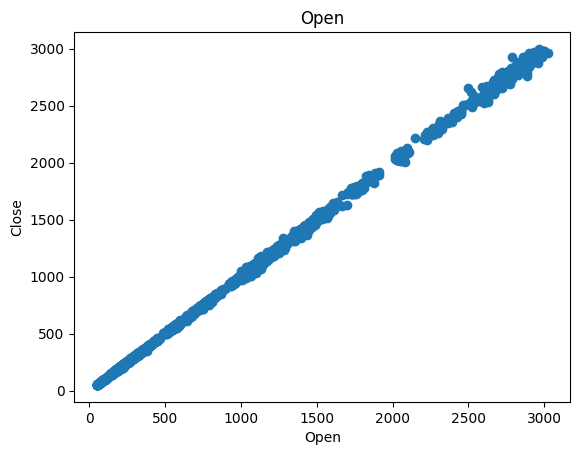

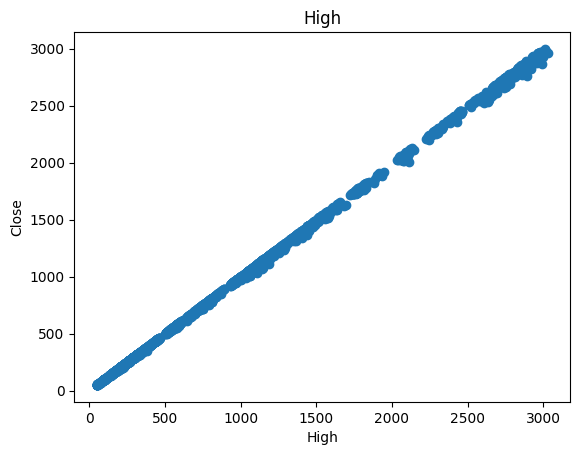

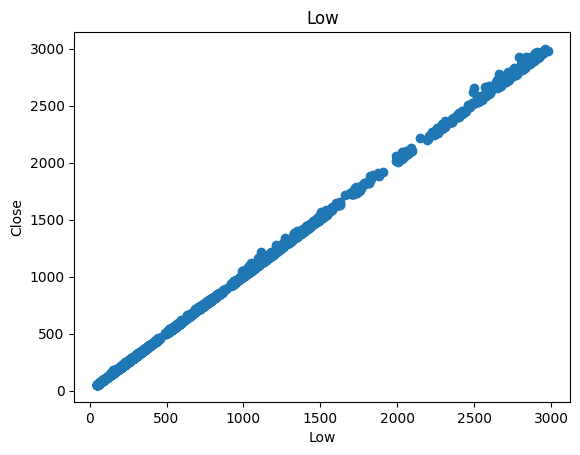

In [9]:
# now let's plot linear relation between columns 
for i in df.columns[:-1]:
    plt.scatter(df[i] , df["Close"])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Close")
   
    plt.show()
    

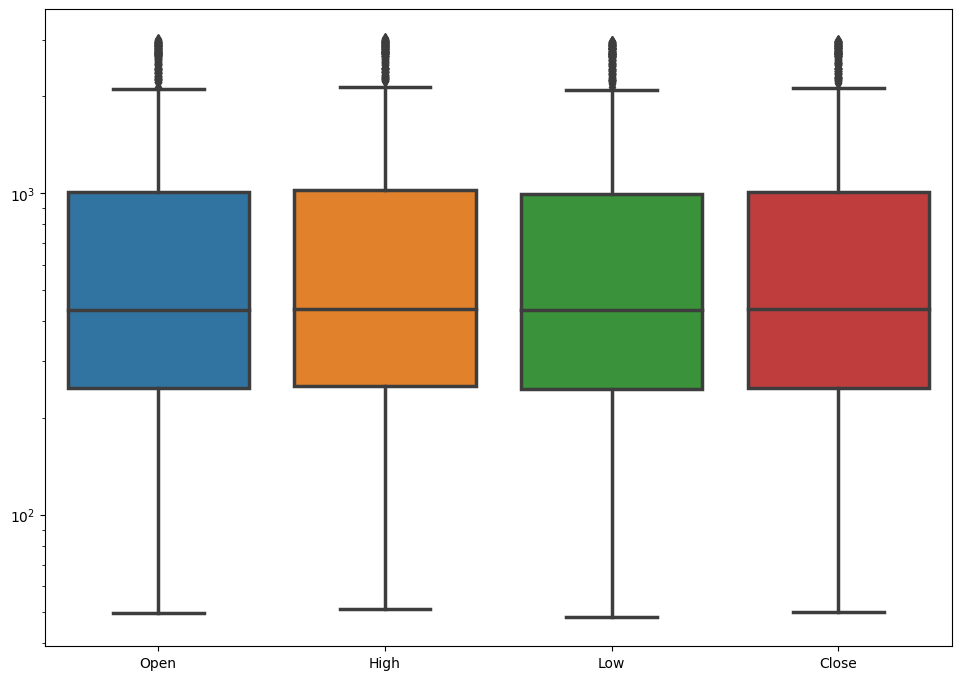

In [10]:
# To check outliers 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

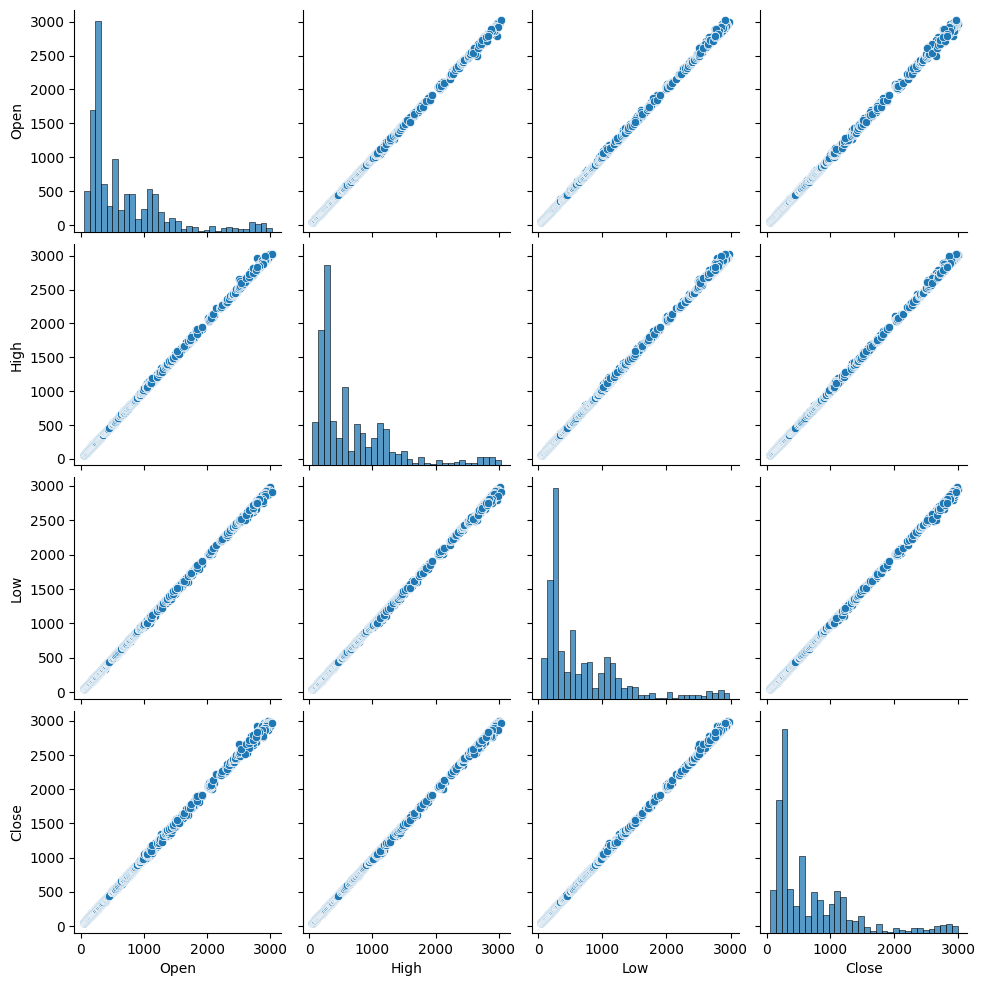

In [11]:
sns.pairplot(df)

In [10]:
# lets set our X and y 
X = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values

In [11]:
print("the data shape is " , df.shape)
print("the X shape is " , X.shape)
print("the y shape is " , y.shape)

the data shape is  (4431, 4)
the X shape is  (4431, 3)
the y shape is  (4431,)


In [16]:
# to scale input data X 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X = scaler.fit_transform(X)  

In [17]:
# splitting our data 80% for training and 20% of testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
# now lets grid each hyperparamters to build best models 
from sklearn.model_selection import GridSearchCV

def grid_search(model , paramters ):
    '''
    function to grid search paramters
    
    '''
    tuning_model = GridSearchCV(estimator=model,param_grid=paramters)
    tuning_model.fit(X_train, y_train)
    print("the best paramter is " , tuning_model.best_params_)
    print("the best score is " , tuning_model.best_score_)

In [19]:
# and evaluate each model and test its performance 
from sklearn.metrics import r2_score
from sklearn import metrics
    
def evaluating_model(y_test, y_pred): 
    ''' 
    Function for evaluating our models.
    '''
    print("Train Result:\n================================================")
    print("the r2 score is " , r2_score(y_test , y_pred) )
    print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

Linear Regression

In [18]:
# Now we will try Multi linear algorithms
from sklearn.linear_model import LinearRegression
Reg_LR = LinearRegression()
Reg_LR.fit(X_train , y_train)
y_pred_LR = Reg_LR.predict(X_test)

In [19]:
LR_evalution = evaluating_model(y_test , y_pred_LR)


Train Result:
the r2 score is  0.9999170964446986
MAE: 3.019690772875549
MSE: 32.67087645642383
RMSE: 5.7158443345164525


Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
Reg_DT = DecisionTreeRegressor()


In [21]:
# Hyper parameters range intialization for tuning 
parameters_DT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [22]:
# best parmters 
grid_search(Reg_DT,parameters_DT)

the best paramter is  {'max_depth': 11, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
the best score is  0.9303994760842356


In [23]:
# now let's apply best paramters
tuned_reg_DT = DecisionTreeRegressor(max_depth=5 , max_features="sqrt" , max_leaf_nodes=90 , min_samples_leaf=7 ,min_weight_fraction_leaf=0.1,
                                     splitter="best")
tuned_reg_DT.fit(X_train,y_train)
y_pred_DT = tuned_reg_DT.predict(X_test)

In [24]:
# now lets evaluate our model 
DT_evaluation = evaluating_model(y_test,y_pred_DT)


Train Result:
the r2 score is  0.9344841648505193
MAE: 79.60093451426158
MSE: 25818.672653145924
RMSE: 160.68189895923538


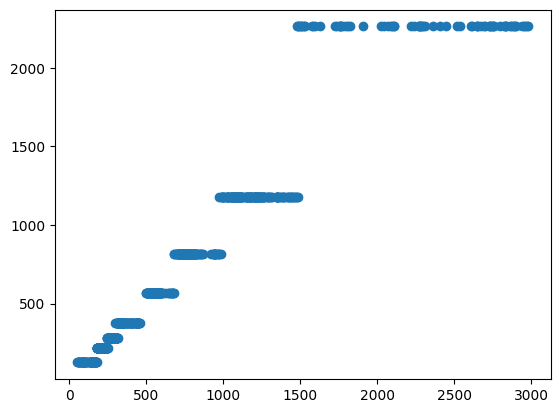

In [25]:
#plot our result
plt.scatter(y_test,y_pred_DT)

Random forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor
Reg_RF = RandomForestRegressor()


In [27]:
# try different paramters
parameters_RF = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]}

In [28]:
# best paramters
grid_search(Reg_RF,parameters_RF)


the best paramter is  {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
the best score is  0.9998477827819737


In [29]:
# now lets apply best parmters
tuning_model_RF = RandomForestRegressor(bootstrap= False , max_depth=30,max_features="sqrt",min_samples_leaf=1
                                        ,min_samples_split=2,n_estimators=200)
tuning_model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=200)

In [30]:
# prediction of y 
y_pred_RF = tuning_model_RF.predict(X_test)

In [31]:
# evaluation 
RF_evaluation= evaluating_model(y_test , y_pred_RF)


Train Result:
the r2 score is  0.9997856294247789
MAE: 4.419463955800554
MSE: 84.47978561935835
RMSE: 9.191288572303579


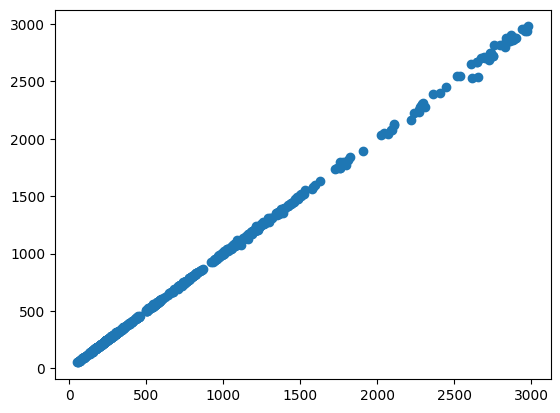

In [32]:
# ploting our data
plt.scatter(y_test,y_pred_RF)

XGboost

In [33]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

In [34]:
# different paramters 
paramters_XGb = {
    'max_depth': [3,5,15],
    'learning_rate':[0.05,0.1],
    'n_estimators':[50,100],
    'min_child_weight' : [1,2,3],
}



In [35]:
# best paramters
grid_search(xgb_model,paramters_XGb)


the best paramter is  {'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 3, 'n_estimators': 100}
the best score is  0.9998324358724728


In [36]:
# lets try the best paramters 
tuning_model_XGb = xgb.XGBRegressor(n_estimators = 100, max_depth = 15, learning_rate = 0.1 , min_child_weight = 3 )
tuning_model_XGb.fit(X_train , y_train)
y_pred_xbg = tuning_model_XGb.predict(X_test)

In [37]:
# evaluate model
XGB_evaluation = evaluating_model(y_test , y_pred_xbg)


Train Result:
the r2 score is  0.9998006237371375
MAE: 4.268199408821321
MSE: 78.57078298565402
RMSE: 8.864016188255412


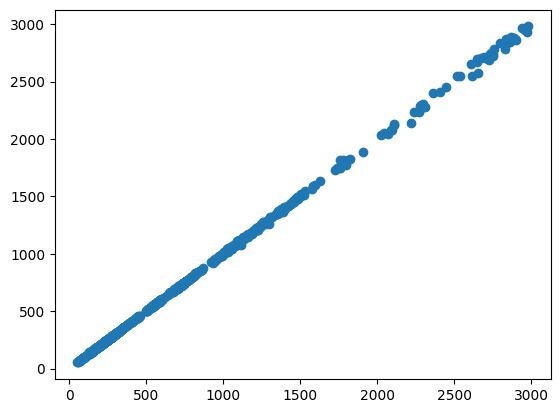

In [38]:
#ploting result
plt.scatter(y_test,y_pred_xbg)

Neural Network 

In [12]:
import tensorflow as tf



In [13]:
nn_model = tf.keras.Sequential()


In [24]:
# set our model 
def train_model():
  '''this function is used to make copy of model and use it in grid search '''
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu'),
     
      tf.keras.layers.Dense(16, activation='relu'),
      
      tf.keras.layers.Dense(1, activation='linear')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)  , loss='mean_squared_error' )
  nn_model.fit(X_train, y_train, epochs=100, batch_size=16 , verbose =0)
  return nn_model 


In [25]:
# making copy of model and grid search paramters 
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasRegressor
classifier = KerasRegressor(build_fn = train_model)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32],
              'epochs': [80 ,100],
              'optimizer': ['adam', 'Adamax'],
              }
tuning_model_nn= GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'r2', verbose = 0
                           )
tuning_model_nn.fit(X_train, y_train, verbose = 0)



 

23/23 [==============================] - 0s 2ms/step


GridSearchCV(estimator=KerasRegressor(build_fn=<function train_model at 0x00000283A17B9EE0>),
             param_grid={'batch_size': [16, 32], 'epochs': [80, 100],
                         'optimizer': ['adam', 'Adamax']},
             scoring='r2')

In [43]:
print("the best paramter is " , tuning_model_nn.best_params_)
print("the best score is " , tuning_model_nn.best_score_)

the best paramter is  {'batch_size': 32, 'epochs': 80, 'optimizer': 'adam'}
the best score is  0.9998547599723


In [26]:
# now lets try best paramters 
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
     
      tf.keras.layers.Dense(64, activation='relu'),
      
      tf.keras.layers.Dense(1, activation='linear')
  ])

model_nn =nn_model.compile(optimizer="adam"  , loss='mean_squared_error'  , metrics="mean_absolute_error")


history =nn_model.fit(X_train, y_train, epochs=80 , validation_split=.02 , verbose = 0)

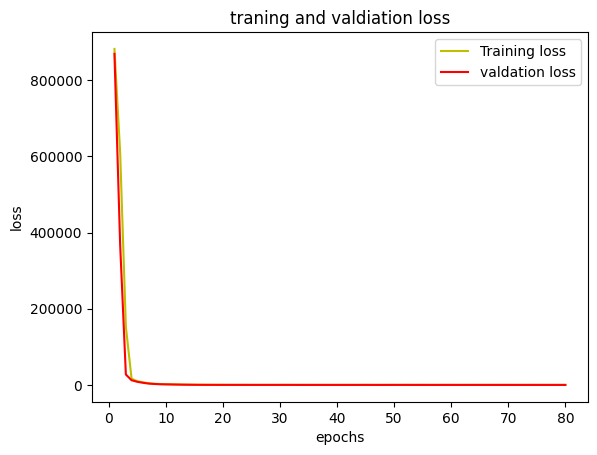

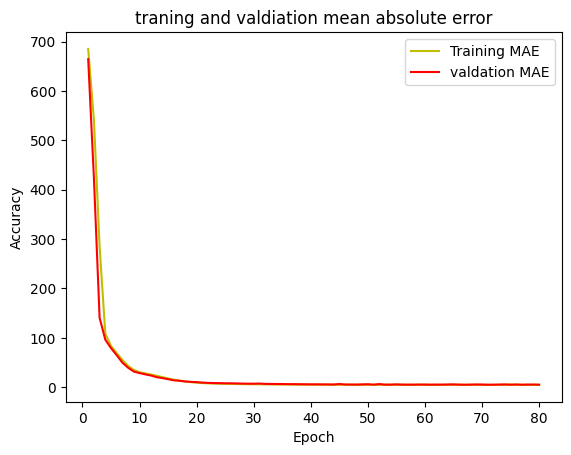

In [27]:
# now we plot loss and MAE of training and Valdation 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='valdation loss')
plt.title('traning and valdiation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history.history['mean_absolute_error']  
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs , acc, "y" ,label='Training MAE') 
plt.plot(epochs, val_acc,"r" , label='valdation MAE')
plt.title('traning and valdiation mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
y_pred_nn = nn_model.predict(X_test)


28/28 [==============================] - 0s 1ms/step


In [ ]:
# evaluate model 
nn_evaluation = evaluating_model(y_test , y_pred_nn)


Train Result:
the r2 score is  0.999709185069653
MAE: 5.456518200383579
MSE: 114.60520150807777
RMSE: 10.705381894546209


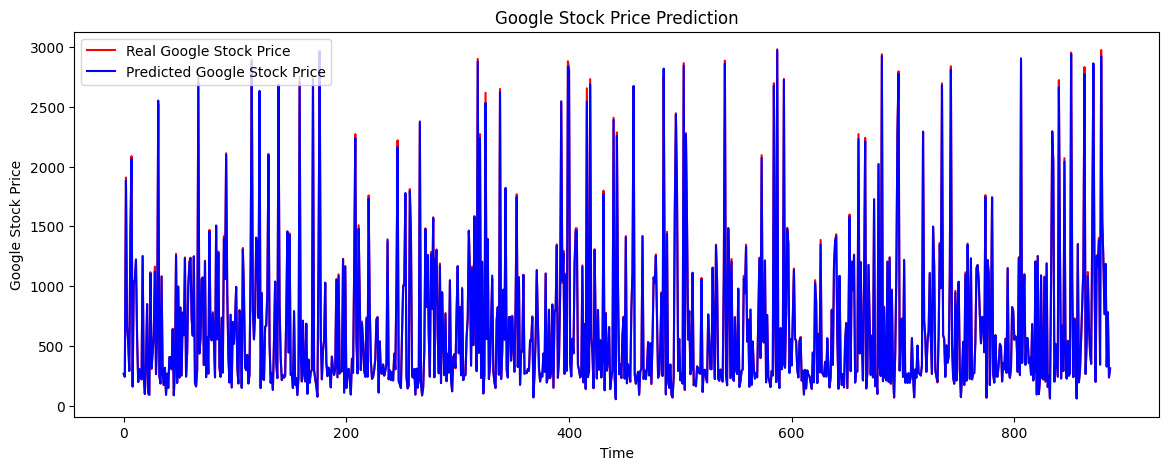

In [ ]:
# lets compare real and predicted data 
y_pred = y_pred_nn
y_test = y_test
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

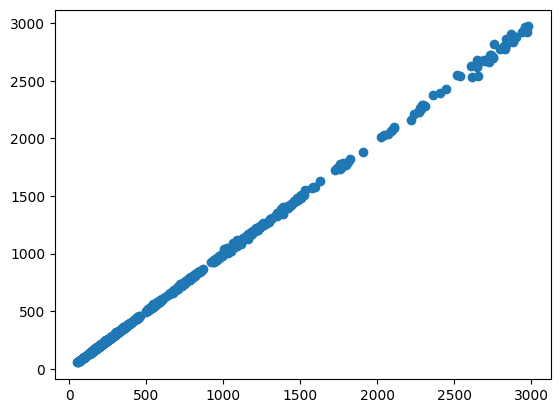

In [ ]:
# then we plot them 
plt.scatter(y_test,y_pred_nn)

Sum up all moduels 

In [ ]:
# now lets see evaluation of  all moduels score 
print("the r2 score of linear regression is " , r2_score(y_test , y_pred_LR) )
print("the r2 score of Descision tree is " , r2_score(y_test , y_pred_DT) )
print("the r2 score of Random forest is " , r2_score(y_test , y_pred_RF) )
print("the r2 score of XGboost is " , r2_score(y_test , y_pred_xbg) )
print("the r2 score of neural netwrok is " , r2_score(y_test , y_pred_nn) )




the r2 score of linear regression is  0.9999170964446986
the r2 score of Descision tree is  0.9345354345399969
the r2 score of Random forest is  0.9997842547683199
the r2 score of XGboost is  0.9998006237371375
the r2 score of neural netwrok is  0.999709185069653
